<a href="https://colab.research.google.com/github/gushenri/DoencaCronicaRenal/blob/main/Doen%C3%A7aCronicaRenal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Agora vai

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline

In [ ]:
data = pd.read_csv("/content/sample_data/kidney_disease_train.csv")

In [ ]:
data.head() #Mostra os 5 primeiros dados

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [ ]:
print(f'Tamanho da base de dados: {data.shape} (linhas , colunas)')

Tamanho da base de dados: (280, 26) (linhas , colunas)


In [ ]:
data.describe().T #cria um descritivo do dataBase sobre a diagonal principal


,count,mean,std,min,25%,50%,75%,max
id,280.0,202.928571,111.988168,1.000,110.50,202.00,302.25,399.000
age,275.0,51.454545,17.476176,2.000,42.00,55.00,65.00,90.000
bp,271.0,76.051661,14.256289,50.000,70.00,70.00,80.00,180.000
sg,244.0,1.017439,0.005746,1.005,1.01,1.02,1.02,1.025
al,245.0,1.024490,1.375805,0.000,0.00,0.00,2.00,5.000
su,242.0,0.438017,1.073193,0.000,0.00,0.00,0.00,5.000
bgr,247.0,150.186235,77.357144,70.000,100.00,124.00,171.50,490.000
bu,266.0,56.983835,51.456635,10.000,27.25,41.00,64.75,391.000
sc,268.0,3.006157,5.850085,0.400,0.90,1.30,2.80,76.000
sod,213.0,137.255869,11.677123,4.500,135.00,138.00,141.00,163.000


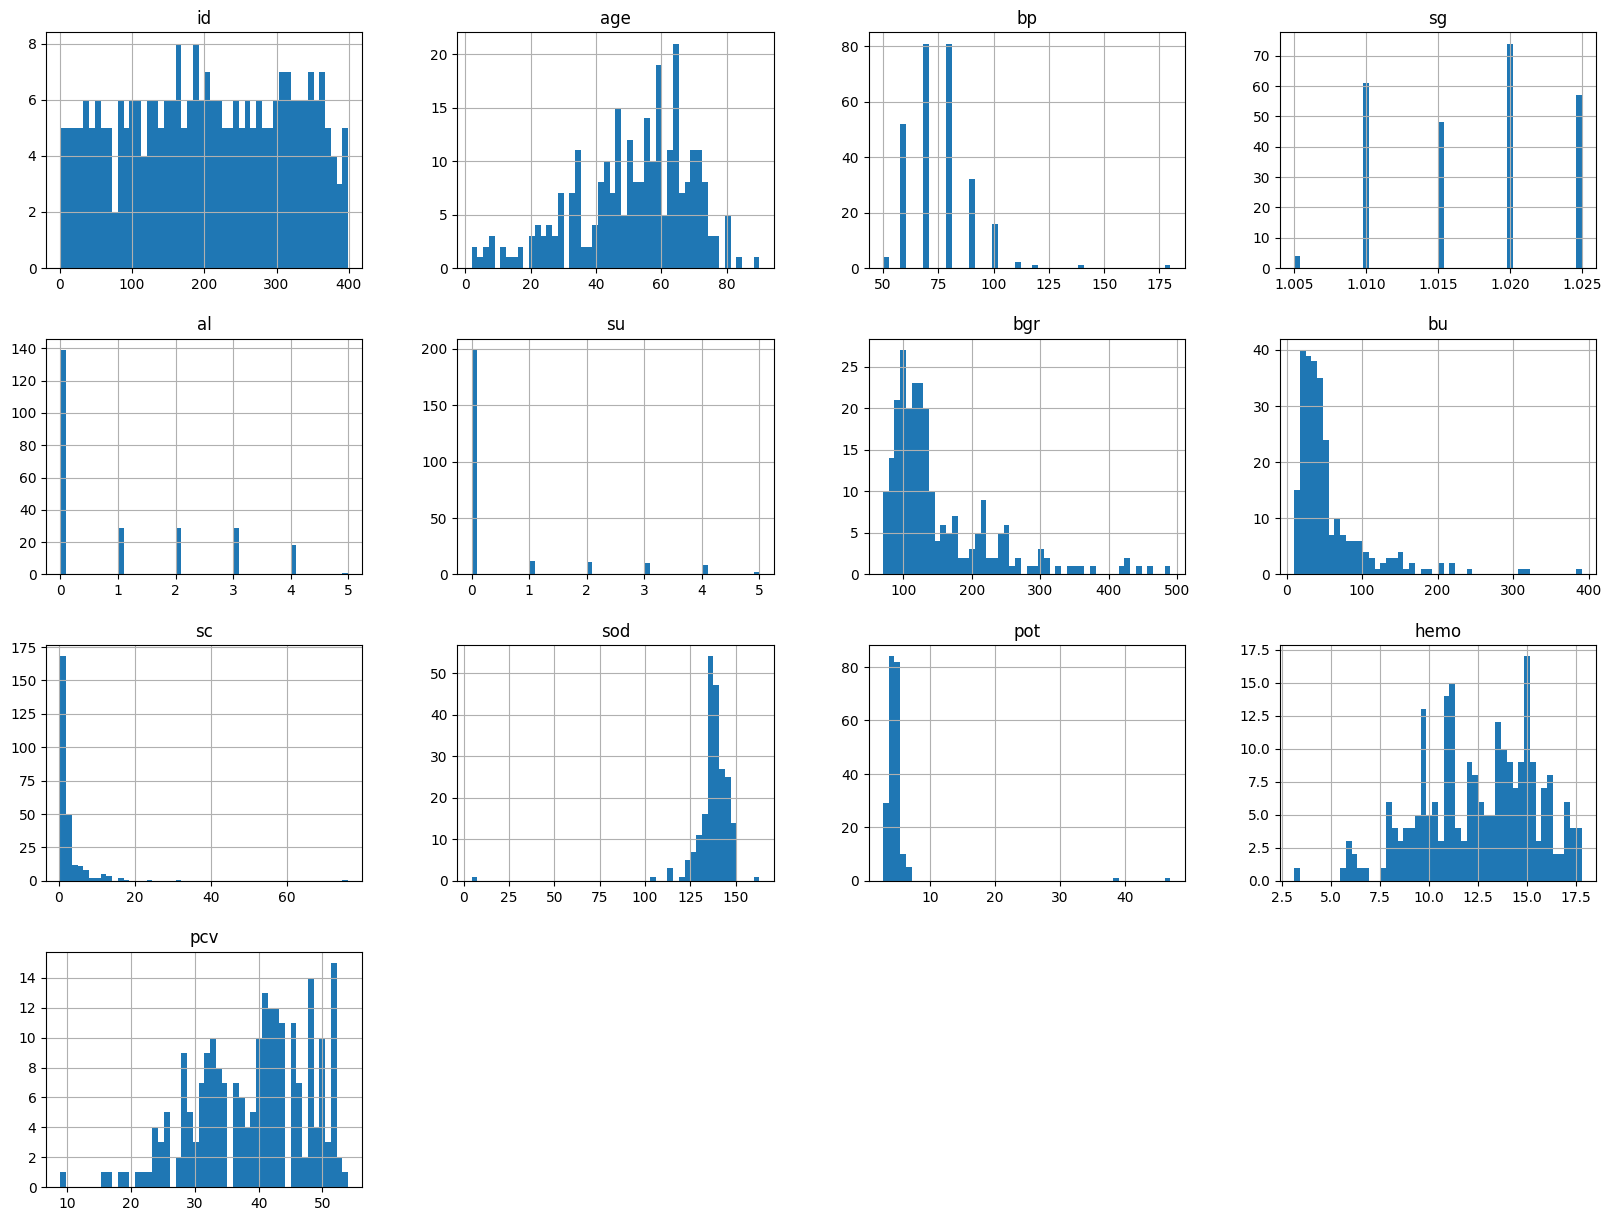

In [ ]:
#Describe em grafico

%matplotlib inline

data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#calculando a distorção dos Dados
data.skew()

<ipython-input-9-bd6a42e9e73a>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


id     -0.056679
age    -0.671129
bp      2.003336
sg     -0.166490
al      1.012426
su      2.528299
bgr     1.964349
bu      2.954937
sc      8.283930
sod    -7.123213
pot     9.860723
hemo   -0.351304
pcv    -0.482163
dtype: float64

In [ ]:
#tipos das classes
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
#colocando as classes em vetores para depois conseguir passa-las para numericas
#e preencher
categoricos=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
numericos=['id','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
print(f'Numeros de variáveis Categóricas: {len(categoricos)}')
print(f'Numeros de variáveis Numerais: {len(numericos)}')

Numeros de variáveis Categóricas: 13
Numeros de variáveis Numerais: 12


As variáveis WC e RC estão como objetos e deveriam estar como Floats... vamos resolver

In [ ]:
#verificar o que está fazendo elas serem objects e n floats
data[data['wc'].map(lambda x: type(x)==str)].wc.value_counts()

11000    8
9600     8
6700     8
9800     7
7200     6
        ..
10900    1
12200    1
5900     1
5200     1
14600    1
Name: wc, Length: 78, dtype: int64

In [ ]:
#verificar o que está fazendo elas serem objects e n floats
data[data['rc'].map(lambda x: type(x)==str)].wc.value_counts()

11000    8
9600     7
7200     6
5800     6
9800     6
        ..
11500    1
10900    1
26400    1
5900     1
14600    1
Name: wc, Length: 73, dtype: int64

havia colunas com caracteres "\t" e " ? " então é nescessários substituir por NaN antes de trata-las para numéricas

In [ ]:
#forço as variaveis virarem float
data['wc']=pd.to_numeric(data['wc'],errors='coerce')
data['rc']=pd.to_numeric(data['rc'],errors='coerce')

In [ ]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
#verificar valores faltantes (contagem ta na linha True)
data.apply(lambda x: x.isna().value_counts()).T #T deixa na Vertical

,False,True
id,280.0,NaN
age,275.0,5.0
bp,271.0,9.0
sg,244.0,36.0
al,245.0,35.0
su,242.0,38.0
rbc,173.0,107.0
pc,230.0,50.0
pcc,276.0,4.0
ba,276.0,4.0


In [ ]:
#Checando ruidos ou valores errados nos Categricos
for cat in categoricos :
  print(f"Contagem de valores para {cat} são \n{data[cat].value_counts()}\n")

Contagem de valores para sg são 
1.020    74
1.010    61
1.025    57
1.015    48
1.005     4
Name: sg, dtype: int64

Contagem de valores para al são 
0.0    139
3.0     29
2.0     29
1.0     29
4.0     18
5.0      1
Name: al, dtype: int64

Contagem de valores para su são 
0.0    199
1.0     12
2.0     11
3.0     10
4.0      8
5.0      2
Name: su, dtype: int64

Contagem de valores para rbc são 
normal      144
abnormal     29
Name: rbc, dtype: int64

Contagem de valores para pc são 
normal      181
abnormal     49
Name: pc, dtype: int64

Contagem de valores para pcc são 
notpresent    250
present        26
Name: pcc, dtype: int64

Contagem de valores para ba são 
notpresent    260
present        16
Name: ba, dtype: int64

Contagem de valores para htn são 
no     177
yes    102
Name: htn, dtype: int64

Contagem de valores para dm são 
no       175
yes       99
\tno       3
\tyes      2
Name: dm, dtype: int64

Contagem de valores para cad são 
no      254
yes      23
\tno      2
Name: cad

In [ ]:
#Removing os caracteres errados com (\t)
#Removendo
data['dm']=data.dm.replace("\tno","no")
data['dm']=data.dm.replace("\tyes","yes")

data['cad']=data.cad.replace("\tno","no")

In [ ]:
#Verificando a Substituição
print(data.dm.value_counts())
print(data.cad.value_counts())

no     178
yes    101
Name: dm, dtype: int64
no     256
yes     23
Name: cad, dtype: int64


In [ ]:
#verificar valores faltantes (contagem ta na linha True)
data.apply(lambda x: x.isna().value_counts()) #T deixa na Vertical

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
False,280.0,275,271,244,245,242,173,230,276,276,...,229,202,186,279,279,279,280.0,280.0,280.0,280.0
True,NaN,5,9,36,35,38,107,50,4,4,...,51,78,94,1,1,1,NaN,NaN,NaN,NaN


Como a base de dados é pequena e temos muitas colunas com valores faltando. Precisamos colocar a mediana nos dados continuos e moda nos dados categóricos.

In [ ]:
# Substituindo os valores numericos com a mediana
for col in numericos:
  print(f'Atribuição para {col} é {data[col].median()} \n')
  data[col]=data[col].fillna(data[col].median())

Atribuição para id é 202.0 

Atribuição para age é 55.0 

Atribuição para bp é 70.0 

Atribuição para bgr é 124.0 

Atribuição para bu é 41.0 

Atribuição para sc é 1.3 

Atribuição para sod é 138.0 

Atribuição para pot é 4.4 

Atribuição para hemo é 12.7 

Atribuição para pcv é 41.0 

Atribuição para wc é 7900.0 

Atribuição para rc é 4.8 



In [ ]:
# Mesma coisa só que com os Categóricos e com a moda
for col in categoricos:
  print(f'Aribuição para {col} é {data[col].mode()[0]}\n')
  data[col]=data[col].fillna(data[col].mode()[0])

Aribuição para sg é 1.02

Aribuição para al é 0.0

Aribuição para su é 0.0

Aribuição para rbc é normal

Aribuição para pc é normal

Aribuição para pcc é notpresent

Aribuição para ba é notpresent

Aribuição para htn é no

Aribuição para dm é no

Aribuição para cad é no

Aribuição para appet é good

Aribuição para pe é no

Aribuição para ane é no



In [ ]:
#Cruzando os dados para verificar se não tem nenhum valor faltante

data.apply(lambda x: x.isna().value_counts()).T

,False
id,280
age,280
bp,280
sg,280
al,280
su,280
rbc,280
pc,280
pcc,280
ba,280


Pronto agora não temos mais dados faltantes...
Precisamos repassar para numéricos

In [ ]:
numericos

['id', 'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [ ]:
# Criar um dicionario para substituir os valores NaN com Numericos para as
# variáveis categóricos

categoricoDic = {
                "rbc":     {"normal": 1, "abnormal": 0},
                "pc":     {"normal": 1, "abnormal": 0},
                "pcc":     {"present": 1, "notpresent": 0},
                "ba":     {"present": 1, "notpresent": 0},
                "htn":     {"yes": 1, "no": 0},
                "dm":     {"yes": 1, "no": 0},
                "cad":     {"yes": 1, "no": 0},
                "pe":     {"yes": 1, "no": 0},
                "ane":     {"yes": 1, "no": 0},
                "appet":     {"good": 1, "poor": 0},
                "classification":     {"ckd": 1, "notckd": 0}
               }

In [ ]:
data.replace(categoricoDic, inplace = True)
#Substituindo as variaveis

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,1,0,0,0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,109,54.0,70.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,17,47.0,80.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,347,43.0,60.0,1.025,0.0,0.0,1,1,0,0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,24,42.0,100.0,1.015,4.0,0.0,1,0,0,1,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


In [ ]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

UHUUUUUUUUUUUUL

Como o ID é um indentificador podemos excluir para não haver ruidos

In [ ]:
data.drop('id',axis=1,inplace=True)

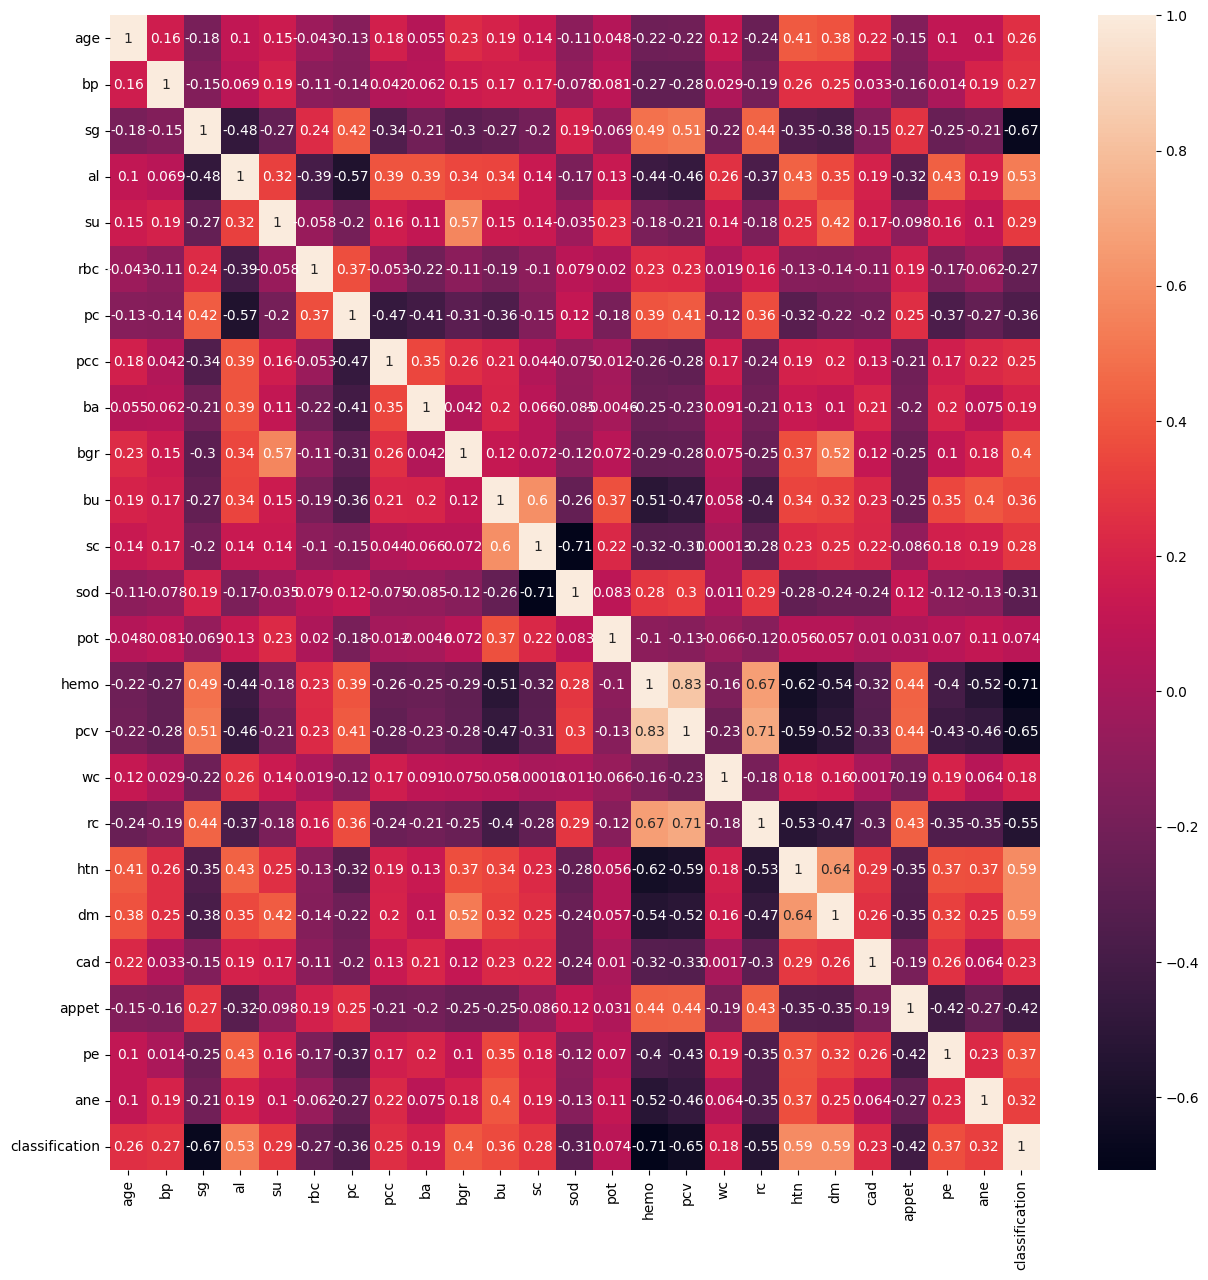

In [ ]:
#Vizualizando o .head() co-relcionando numeros com caracteristicas.
#Se todos estão equivalentes
#e então entendemos quais numeros de cada classes são grandes ou pequenos
plt.figure(figsize=(15,15))
data_corr = data.corr()
sns.heatmap(data_corr,
            xticklabels = data_corr.columns.values,
            yticklabels = data_corr.columns.values,
            annot = True);

Considerando os coeficientes maiores que 0.6

1) pc,hemo são altos correlacionada com 0.82

2) rc,hemo são altos correlacionada com 0.67

3) rc,pcv são altos correlacionada com 0.72

4) dm,htn são altos correlacionada com 0.64

5) hemo,htn são altos correlacionada com 0.61

Olhar o Cancer ML e verificar a divisão de dados

In [ ]:
copyData = data
#drop_feat=['hemo','pcv','htn']
#copyData.drop(drop_feat,axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split #usado para dividir treino e teste
from sklearn.preprocessing import MinMaxScaler #usado para deixar os dados na msm escala

In [ ]:
#Vamos dividir a tebela de treino entre um com só a classificação e outro sem classificação
y = copyData ['classification']
x = copyData.drop(['classification'], axis = 1)

In [ ]:
#Balancear os dados com o MinMax
bal = MinMaxScaler().fit(x)
x_bal = bal.transform(x)

type(x_bal) #ndarray é um vetor matriz

numpy.ndarray

In [ ]:
x_bal

array([[0.68181818, 0.15384615, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.59090909, 0.15384615, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.51136364, 0.23076923, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23863636, 0.23076923, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.40909091, 0.23076923, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.17045455, 0.07692308, 0.25      , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y, test_size=0.30, random_state=42)

In [ ]:
print ('Tamanho do x treino', x_train.shape, "(Linha,Coluna)")
print ('Tamanho do x teste', x_test.shape, "(Linha,Coluna)")
print ('Tamanho do y treino', y_train.shape, "(Linha,Coluna)")
print ('Tamanho do y teste' , y_test.shape , "(Linha,Coluna)")
print ('---------------------- \n Lembrando: \n x - sem classificação \n y - só a classificação')

Tamanho do x treino (196, 24) (Linha,Coluna)
Tamanho do x teste (84, 24) (Linha,Coluna)
Tamanho do y treino (196,) (Linha,Coluna)
Tamanho do y teste (84,) (Linha,Coluna)
---------------------- 
 Lembrando: 
 x - sem classificação 
 y - só a classificação


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Definindo os parâmetros do AdaBoost
n_estimators = 200
base_estimator = DecisionTreeClassifier(max_depth=1)  # Classificador fraco (árvore de decisão de profundidade 1)
learning_rate = 1.0
algorithm = 'SAMME'
random_state = 42  # Semente aleatória para reprodutibilidade


1)n_estimators: Este é o número de classificadores fracos que o AdaBoost irá utilizar para criar o classificador forte. Um valor maior geralmente resulta em um modelo mais poderoso, mas também pode levar a um maior tempo de treinamento e a um aumento no risco de overfitting.

2)base_estimator: Este parâmetro permite que você especifique o classificador fraco a ser usado no AdaBoost. O valor padrão é geralmente um classificador de árvore de decisão, mas você pode especificar outros classificadores, como árvores de profundidade limitada, SVMs ou outros classificadores.

3)learning_rate: Este parâmetro controla a taxa de aprendizado do algoritmo. Um valor menor resulta em uma adaptação mais lenta dos pesos dos exemplos incorretamente classificados, enquanto um valor maior faz com que o modelo se adapte mais rapidamente. É importante ajustar esse parâmetro em conjunto com o número de estimadores para obter um bom desempenho do modelo.

4)algorithm: Este parâmetro permite escolher o algoritmo a ser usado para atualizar os pesos dos exemplos durante o treinamento. Os valores comuns são 'SAMME' (que é o algoritmo original) e 'SAMME.R' (que é uma versão otimizada que lida com probabilidades reais em vez de classes discretas).

5)random_state: Este é um parâmetro para controlar a semente aleatória usada pelo AdaBoost para garantir a reprodutibilidade dos resultados.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
#verificar os parametros e ver a acuracia -- Ada(parametros).fit(X_train,y_train)

ada = AdaBoostClassifier(
    #base_estimator=base_estimator,
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    algorithm=algorithm,
    random_state=random_state
)

modelo = ada.fit(x_train,y_train)
y_prev = modelo.predict(x_test)

In [ ]:
y_prev

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

# Avaliar a precisão
print(accuracy_score(y_test, y_prev))

0.9880952380952381


In [ ]:
#base_estimator: É o algoritmo utilizado para treinar os modelos fracos.
#O padrão é a arvore de decisão, a não ser que queira algo especifico,
#isso não precisa ser alterado.

#n_estimators: É o número de modelos que ele vai utilizar para o treino.

#learning_rate: É a taxa de aprendizado, um valor muito baixo demorará mais,
#mas as vezes com melhor resultado

#loss: É exclusivo da AdaBoostRegressor e define a função de perda para usar
#ao atualizar pesos. Por padrão, será utilizadao a função de perda linear,
#pode ser alterada para quadrada ou exponencial.

____________________________________________________________
============================================================
============================================================
____________________________________________________________

Testes de Parametros




In [ ]:

# Definindo as combinações de parâmetros que deseja testar
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0, 'max_depth': 1, 'algorithm': 'SAMME', 'random_state': 42},
    {'n_estimators': 50, 'learning_rate': 0.5, 'max_depth': 2, 'algorithm': 'SAMME', 'random_state': 0},
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3, 'algorithm': 'SAMME', 'random_state': 123},
    {'n_estimators': 50, 'learning_rate': 1.0, 'max_depth': 1, 'algorithm': 'SAMME.R', 'random_state': 42},
    {'n_estimators': 50, 'learning_rate': 0.5, 'max_depth': 2, 'algorithm': 'SAMME.R', 'random_state': 0},
    {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3, 'algorithm': 'SAMME.R', 'random_state': 123},
    {'n_estimators': 100, 'learning_rate': 1.0, 'max_depth': 1, 'algorithm': 'SAMME', 'random_state': 42},
    {'n_estimators': 100, 'learning_rate': 0.5, 'max_depth': 2, 'algorithm': 'SAMME', 'random_state': 0},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'algorithm': 'SAMME', 'random_state': 123},
    {'n_estimators': 100, 'learning_rate': 1.0, 'max_depth': 1, 'algorithm': 'SAMME.R', 'random_state': 42},
    {'n_estimators': 100, 'learning_rate': 0.5, 'max_depth': 2, 'algorithm': 'SAMME.R', 'random_state': 0},
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'algorithm': 'SAMME.R', 'random_state': 123},
    {'n_estimators': 200, 'learning_rate': 1.0, 'max_depth': 1, 'algorithm': 'SAMME.R', 'random_state': 42},
    {'n_estimators': 200, 'learning_rate': 0.5, 'max_depth': 2, 'algorithm': 'SAMME.R', 'random_state': 0},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3, 'algorithm': 'SAMME.R', 'random_state': 123},
    {'n_estimators': 200, 'learning_rate': 1.0, 'max_depth': 1, 'algorithm': 'SAMME', 'random_state': 42},
    {'n_estimators': 200, 'learning_rate': 0.5, 'max_depth': 2, 'algorithm': 'SAMME', 'random_state': 0},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3, 'algorithm': 'SAMME', 'random_state': 123}
]

# Criando uma lista para armazenar os resultados
results = []


In [ ]:

# Iterando sobre as combinações de parâmetros e calculando a acurácia
for params in param_combinations:
    n_estimators = params['n_estimators']
    learning_rate = params['learning_rate']
    max_depth = params['max_depth']
    algorithm = params['algorithm']
    random_state = params['random_state']

    # Criando o classificador AdaBoost com os parâmetros
    ada_boost_classifier = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=max_depth),
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=random_state
    )

    # Treinando o classificador
    ada_boost_classifier.fit(x_train, y_train)

    # Fazendo previsões
    y_pred = ada_boost_classifier.predict(x_test)

    # Calculando a acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Armazenando os resultados
    results.append({'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth, 'algorithm': algorithm, 'random_state': random_state, 'accuracy': accuracy})



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
# Criando uma tabela de resultados com pandas
results_df = pd.DataFrame(results)

# Exibindo a tabela de resultados
print(results_df)


    n_estimators  learning_rate  max_depth algorithm  random_state  accuracy
0             50            1.0          1     SAMME            42  0.976190
1             50            0.5          2     SAMME             0  0.988095
2             50            0.1          3     SAMME           123  0.916667
3             50            1.0          1   SAMME.R            42  0.988095
4             50            0.5          2   SAMME.R             0  0.940476
5             50            0.1          3   SAMME.R           123  0.976190
6            100            1.0          1     SAMME            42  0.976190
7            100            0.5          2     SAMME             0  0.988095
8            100            0.1          3     SAMME           123  0.916667
9            100            1.0          1   SAMME.R            42  0.988095
10           100            0.5          2   SAMME.R             0  0.940476
11           100            0.1          3   SAMME.R           123  0.940476